<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">

Classification en utilisant les arbres de décisions  <br><br>
avec scikit-learn
<br><br>
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Analyse des données journalière méteorologique  </p>

Dans ce notebook nous allons prédire des données méteorologique .

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importer les librairies nécéssaires <br></p>

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# id3 ou c45

In [2]:
data = pd.read_csv('./weather/daily_weather.csv')


les colonnes du dataset .

In [3]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')



ce dataset consiste à cet ensemble de variables :

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)


In [5]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [6]:
data[data.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

néttoyage de données  <br><br></p>

number n'est pas utilisé alors on le supprime 

In [9]:
del data['number']

KeyError: 'number'

supprimer les valeurs nulles .

In [10]:
before_rows = data.shape[0]
print(before_rows)

1095


In [12]:
data = data.dropna()

In [13]:
after_rows = data.shape[0]
print(after_rows)

1064


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Combien de lignes sont supprimées ?<br><br></p>


In [14]:
before_rows - after_rows

31

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Convertir à une tache de Classification <br><br></p>
Binariser le relative_humidity_3pm to 0 ou 1.<br>


In [15]:
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99)*1
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
5       1
6       0
7       1
8       0
9       1
10      1
11      1
12      1
13      1
14      0
15      0
17      0
18      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      1
28      1
29      1
30      1
       ..
1064    1
1065    1
1067    1
1068    1
1069    1
1070    1
1071    1
1072    0
1073    1
1074    1
1075    0
1076    0
1077    1
1078    0
1079    1
1080    0
1081    0
1082    1
1083    1
1084    1
1085    1
1086    1
1087    1
1088    1
1089    1
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int32


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

les cibles sont stockées dans 'y'.
<br><br></p>


In [18]:
#On stocke dans y la cible (target: what we have to predict)
y=clean_data[['high_humidity_label']].copy()
#y

In [19]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [20]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Utiliser signaux des capteurs à 9am pour prédire l'humidité à 3pm

<br><br></p>


In [21]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

In [22]:
X = clean_data[morning_features].copy()

In [23]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [24]:
X.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0


In [25]:
y.columns

Index(['high_humidity_label'], dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Holdout - diviser le dataset en ensemble d'apprentissage et test

<br><br></p>



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [27]:
#type(X_train)
#type(X_test)
#type(y_train)
#type(y_test)
#X_train.head()
y_train.describe()

,high_humidity_label
count,712.000000
mean,0.494382
std,0.500320
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

apprendre le modèle sur les données d'apprentissage 
<br><br></p>


In [65]:
# leaf nodes : feuilles (les resultats)
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=12, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [66]:
type(humidity_classifier)

sklearn.tree.tree.DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Prédire les données de test

<br><br></p>


In [67]:
predictions = humidity_classifier.predict(X_test)

In [68]:
predictions[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [69]:
y_test['high_humidity_label'][:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_label, dtype: int32

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Mesurer la précision du modèle
<br><br></p>


In [70]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.8181818181818182

In [75]:
y_pred = predictions
class_names = y

Confusion matrix, without normalization
[[138  37]
 [ 27 150]]
Normalized confusion matrix
[[0.79 0.21]
 [0.15 0.85]]


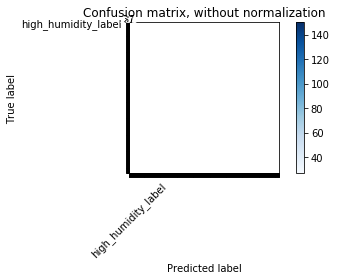

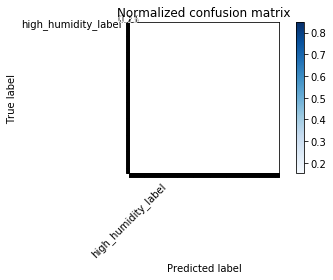

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [100]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.8181818181818182

In [107]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train, y_train)

c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [111]:
accuracy_score(y_true = y_test, y_pred = knn2.predict(X_test))

0.8125

### SVM

In [109]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', C=0.01)
svm = classifier.fit(X_train, y_train)

c:\users\sarae\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
accuracy_score(y_true = y_test, y_pred = svm.predict(X_test))

0.8125